In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report 

In [4]:
bankers = pd.read_csv("bank-full.csv")

In [5]:
bankers

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [6]:
bankers.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
dummy = pd.get_dummies(bankers["y"])
dummy

,no,yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
45206,0,1
45207,0,1
45208,0,1
45209,1,0


In [8]:
bankers.drop(["y","job","marital","education","default","housing","loan","contact","month","poutcome"],inplace=True,axis=1)

In [9]:
bankers

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


In [10]:
bankers1=pd.concat((bankers,dummy),axis=1)
bankers1
bankers1.head(5)

,age,balance,day,duration,campaign,pdays,previous,no,yes
0,58,2143,5,261,1,-1,0,1,0
1,44,29,5,151,1,-1,0,1,0
2,33,2,5,76,1,-1,0,1,0
3,47,1506,5,92,1,-1,0,1,0
4,33,1,5,198,1,-1,0,1,0


In [11]:
X = bankers1.iloc[:,0:7]

In [12]:
X

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


In [13]:
Y=bankers1.iloc[:,7:8]

In [14]:
Y

,no
0,1
1,1
2,1
3,1
4,1
...,...
45206,0
45207,0
45208,0
45209,1


In [15]:
classifier = LogisticRegression()
classifier.fit(X,Y)

C:\Users\SAI HARI\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\SAI HARI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
classifier.coef_

array([[ 5.03867716e-02, -3.58397204e-05,  3.47135527e-02,
        -3.17486925e-03,  2.38062293e-01, -9.13765457e-04,
        -9.61407133e-02]])

In [17]:
classifier.predict_proba(X)

array([[0.0761368 , 0.9238632 ],
       [0.0983567 , 0.9016433 ],
       [0.13005793, 0.86994207],
       ...,
       [0.22524923, 0.77475077],
       [0.05493693, 0.94506307],
       [0.37399327, 0.62600673]])

In [18]:
y_pred=classifier.predict(X)
bankers1["y_pred"]=y_pred
bankers1

,age,balance,day,duration,campaign,pdays,previous,no,yes,y_pred
0,58,2143,5,261,1,-1,0,1,0,1
1,44,29,5,151,1,-1,0,1,0,1
2,33,2,5,76,1,-1,0,1,0,1
3,47,1506,5,92,1,-1,0,1,0,1
4,33,1,5,198,1,-1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,1,1
45207,71,1729,17,456,2,-1,0,0,1,1
45208,72,5715,17,1127,5,184,3,0,1,1
45209,57,668,17,508,4,-1,0,1,0,1


In [19]:
y_prob = pd.DataFrame(classifier.predict_proba(X.iloc[:,:]))
new_df = pd.concat([bankers1,y_prob],axis=1)
new_df

,age,balance,day,duration,campaign,pdays,previous,no,yes,y_pred,0,1
0,58,2143,5,261,1,-1,0,1,0,1,0.076137,0.923863
1,44,29,5,151,1,-1,0,1,0,1,0.098357,0.901643
2,33,2,5,76,1,-1,0,1,0,1,0.130058,0.869942
3,47,1506,5,92,1,-1,0,1,0,1,0.075777,0.924223
4,33,1,5,198,1,-1,0,1,0,1,0.180473,0.819527
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,1,1,0.307881,0.692119
45207,71,1729,17,456,2,-1,0,0,1,1,0.039112,0.960888
45208,72,5715,17,1127,5,184,3,0,1,1,0.225249,0.774751
45209,57,668,17,508,4,-1,0,1,0,1,0.054937,0.945063


In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
confusion_matrix=confusion_matrix(Y,y_pred)
print(confusion_matrix)

[[  844  4445]
 [  674 39248]]


In [22]:
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.56      0.16      0.25      5289
           1       0.90      0.98      0.94     39922

    accuracy                           0.89     45211
   macro avg       0.73      0.57      0.59     45211
weighted avg       0.86      0.89      0.86     45211



In [23]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [24]:
Logit_roc_score = roc_auc_score(Y,classifier.predict(X))
Logit_roc_score

0.5713467788942076

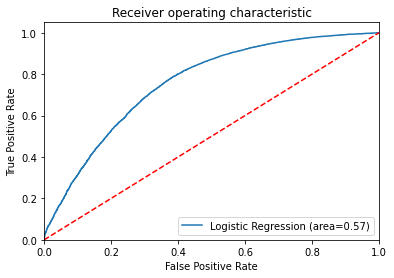

In [25]:
fpr, tpr, thresholds = roc_curve(Y,classifier.predict_proba(X)[:,1]) 
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% Logit_roc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()  

In [26]:
y_prob1 = pd.DataFrame(classifier.predict_proba(X)[:,1]) 

In [27]:
y_prob1

,0
0,0.923863
1,0.901643
2,0.869942
3,0.924223
4,0.819527
...,...
45206,0.692119
45207,0.960888
45208,0.774751
45209,0.945063


In [28]:
import statsmodels.api as sm  

In [29]:
logit = sm.Logit(Y, X)  

In [30]:
logit.fit().summary() 

C:\Users\SAI HARI\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\SAI HARI\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


Optimization terminated successfully.
         Current function value: inf
         Iterations 7


C:\Users\SAI HARI\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
C:\Users\SAI HARI\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     no   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45204
Method:                           MLE   Df Model:                            6
Date:                Thu, 21 Jan 2021   Pseudo R-squ.:                     inf
Time:                        11:35:49   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0505      0.001     53.998      0.000       0.049       0.052
balance    -3.748e-05   4.26e-06     -8.791      0.000   -4.58e-05   -2.91e-05
day            0.0371      0.002     20.674      0.000       0.034       0.041
duration      -0.0031   5.37e-05    -57.920      0.000      -0.003      -0.003
campaign       0.2404      0.011     21.969      0.000       0.219       0.262
pdays         -0.0010      0.000     -6.532      0.000      -0.001      -0.001
previous      -0.0853      0.008    -11.202      0.000      -0.100      -0.070
==============================================================================
"""

In [31]:
pd.set_option("display.max_columns",None)

In [32]:
fpr

array([0.        , 0.        , 0.        , ..., 0.99981093, 1.        ,
       1.        ])

In [33]:
tpr  

array([0.00000000e+00, 2.50488452e-05, 2.75537298e-03, ...,
       9.99924853e-01, 9.99924853e-01, 1.00000000e+00])